In [35]:
import math

import perceval as pcvl
import perceval.components.unitary_components as comp
from perceval.components import BS, PERM

In [40]:
# Gates
Z = pcvl.PS(math.pi)
THETA_1 = (math.pi*54.74)/90
THETA_2 = (math.pi*17.63)/90

# Simulation config
logical_qubits = 2
source = pcvl.Source() # emission_probability=0.40, multiphoton_component=0.01
QPU = pcvl.Processor("SLOS", logical_qubits*2, source)

![as width=50%](img/CZ.jpg)

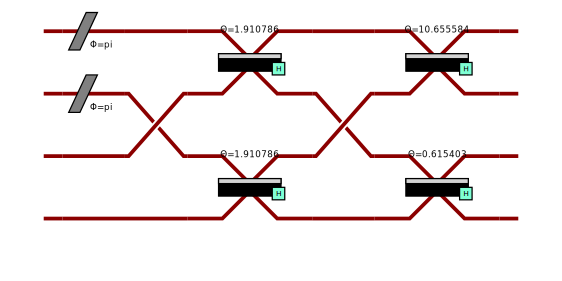

In [41]:
QPU.add(0, Z)
QPU.add(1, Z)

QPU.add(1, PERM([1, 0]))

QPU.add(0, BS.H(theta=THETA_1))
QPU.add(2, BS.H(theta=THETA_1))

QPU.add(1, PERM([1, 0]))

QPU.add(0, BS.H(theta=-1*THETA_1))
QPU.add(2, BS.H(theta=THETA_2))

pcvl.pdisplay(QPU, recursive=False)

In [42]:
QPU.with_input(pcvl.BasicState([0, 1, 0, 1]))

# |11> -> -|11>

pcvl.pdisplay(QPU.source_distribution, precision=1e-4)

state,probability
"|0,1,0,1>",1


In [45]:
states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(QPU, states)
ca.compute(expected={"00": "00", "01": "01", "10": "10", "11": "11"})
pcvl.pdisplay(ca)
print(f"performance = {pcvl.simple_float(ca.performance)[1]}, fidelity = {ca.fidelity*100}%")


'''
empty_sv = StateVector()
bs = BasicState("|1,0,1,0>")
sv1 = StateVector(bs)
sv2 = StateVector([1, 0, 1, 0])  # same
sv3 = StateVector("|1,0,1,0>")  # same
assert sv1 == sv2 and sv1 == sv3
'''

,00,01,10,11
00,0.302691,0.03057,0.605579,0.06116
01,0.599464,0.000613586,0.145583,0.254339
10,0.254339,0.145583,0.000613586,0.599464
11,0.06116,0.605579,0.03057,0.302691


performance = 1, fidelity = (15.165239125249197+0j)%


'\nempty_sv = StateVector()\nbs = BasicState("|1,0,1,0>")\nsv1 = StateVector(bs)\nsv2 = StateVector([1, 0, 1, 0])  # same\nsv3 = StateVector("|1,0,1,0>")  # same\nassert sv1 == sv2 and sv1 == sv3\n'

In [ ]:
backend = pcvl.backends.StatesVectorSimulator()

# Crear un simulador con el backend especificado
simulator = pcvl.Simulator(backend)

# Ejecutar el circuito en el simulador
final_state = simulator.run(QPU)

# Obtener el vector de estado resultante
state_vector = final_state.state_vector

# Imprimir el vector de estado
print("Vector de estado:", state_vector)

In [51]:
pcvl.catalog.list()

['klm cnot',
 'heralded cnot',
 'postprocessed cnot',
 'heralded cz',
 'generic 2 mode circuit',
 'mzi phase first',
 'mzi phase last',
 'postprocessed ccz',
 'toffoli']